## Experimental Results for Baseline Model 

In [7]:
## Import libraries 
import os

import pandas as pd
import numpy as np

from scipy import sparse

from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context("paper", font_scale=1.5)

In [89]:
# define functions 
def mean_absolute_percentage_error(y_true,y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Read Data 

In [80]:
## Read All data 
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/baseline_model')

## Load Columns 
columns = pd.read_csv('columns.csv').rename(columns={'0':'feature'})

## Read Test Set 
X_test = sparse.load_npz('test/X_test.npz')
y_test = pd.read_hdf('test/y_test.hdf', key='test')

## Load Model 

In [81]:
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/models/baseline_model')

## Load Model 
gbm = pickle.load(open('model.sav', 'rb'))
# Make predictions on test set 
y_pred_test = gbm.predict(X_test)

## Visualize Feature Importance

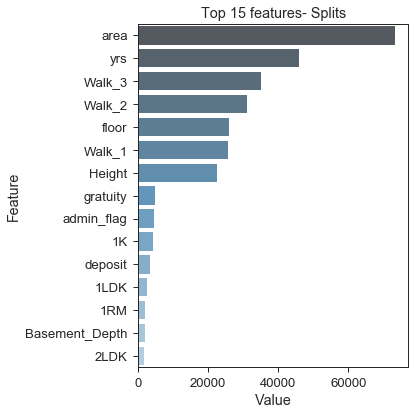

In [82]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Splits')

plt.tight_layout()

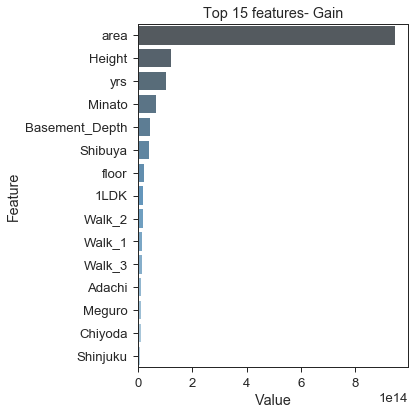

In [83]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(importance_type='gain'),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Gain')

plt.tight_layout()

In [84]:
## Need to make code that writes a file for this at the end
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/postproc')
postproc = pd.read_csv('tokyo_postproc.csv')

In [86]:
## Combine Test Predictions and Actuals 
testframe = pd.DataFrame({'pred':y_pred_test,'actual':y_test})
testframe['residuals'] = testframe.pred - testframe.actual
testframe = pd.merge(testframe, postproc, left_index=True,right_index=True)
testframe.head(10)

,pred,actual,residuals,title,location,yrs,floor,rent,deposit,gratuity,...,Car_2,Walk_2,Bus_2,Line_2,Station_2,Car_3,Walk_3,Bus_3,Line_3,Station_3
132476,86786.102044,85000,1786.102044,東京メトロ丸ノ内線 中野坂上駅 3階建 築27年,中野区中野１,27,1,85000,1,0,...,NaN,10.0,NaN,都営大江戸線,中野坂上駅,NaN,9.0,NaN,ＪＲ総武線,東中野駅
132477,52498.662889,53700,-1201.337111,京成本線 京成高砂駅 2階建 築40年,葛飾区柴又４,40,2,53700,1,1,...,NaN,4.0,NaN,京成金町線,柴又駅,NaN,8.0,NaN,北総線,新柴又駅
132478,66533.623863,65000,1533.623863,東急目黒線 武蔵小山駅 4階建 築31年,目黒区目黒本町６,31,4,62000,0,0,...,NaN,9.0,NaN,東急目黒線,西小山駅,NaN,20.0,NaN,東急東横線,学芸大学駅
132479,82521.077222,79000,3521.077222,クレアール多摩川,大田区多摩川１,17,3,74000,1,1,...,NaN,11.0,NaN,東急池上線,蓮沼駅,NaN,12.0,NaN,東急多摩川線,武蔵新田駅
132480,84569.426297,81000,3569.426297,レオパレス八雲第１０番,目黒区八雲３,26,1,76000,0,1,...,NaN,12.0,NaN,東急大井町線,自由が丘駅,NaN,15.0,NaN,東急東横線,都立大学駅
132481,101812.840092,105000,-3187.159908,都営浅草線 戸越駅 9階建 新築,品川区平塚１,0,6,93000,0,0,...,NaN,6.0,NaN,東急池上線,戸越銀座駅,NaN,9.0,NaN,東急大井町線,戸越公園駅
132482,71260.529607,78000,-6739.470393,東武伊勢崎線 西新井駅 4階建 築26年,足立区西新井栄町２,26,3,78000,1,1,...,NaN,6.0,NaN,東武大師線,大師前駅,NaN,18.0,NaN,東武伊勢崎線,梅島駅
132483,64500.650620,64000,500.650620,サンシャイン北小岩（サンシャインキタコイワ）,江戸川区北小岩４,0,2,59000,0,0,...,NaN,19.0,NaN,ＪＲ総武線,小岩駅,NaN,15.0,NaN,京成本線,京成小岩駅
132484,73750.230473,73000,750.230473,ＭＩＲＡＲＫ,足立区谷中２,35,1,70000,0,0,...,NaN,25.0,NaN,ＪＲ常磐線,亀有駅,NaN,25.0,NaN,東京メトロ千代田線,綾瀬駅
132485,104391.225404,105000,-608.774596,東急世田谷線 世田谷駅 2階建 築10年,世田谷区弦巻１,10,1,99000,1,1,...,NaN,9.0,NaN,東急世田谷線,上町駅,NaN,15.0,NaN,東急田園都市線,桜新町駅


In [87]:
## Rebin values
testframe['targetbins'] = pd.qcut(testframe['target'],15)

## Analysis by Price Bin 

In [93]:
## MAPE/RMSE BINS 
bins = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['targetbins'].sort_values().unique():
    binnedtarget = testframe[testframe['targetbins'] == i]
    MAPE = mean_absolute_percentage_error(binnedtarget['actual'],binnedtarget['pred'])
    RMSE = np.sqrt(mean_squared_error(binnedtarget['actual'], binnedtarget['pred']))
    print(i, MAPE, RMSE)
    bins.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
SCORESDF = pd.DataFrame({'price_bins':bins,'MAPE':MAPEscores,'RMSE':RMSEscores})

(23999.999, 53000.0] 10.13416937413531 6408.604340808975
(53000.0, 60000.0] 6.665116452975493 5303.090528804943
(60000.0, 66000.0] 6.21822808301561 5445.759131110232
(66000.0, 72000.0] 5.603718204077178 5636.850641426665
(72000.0, 77000.0] 5.804935272372418 6368.847927953449
(77000.0, 82500.0] 5.643480013443903 6449.811046135521
(82500.0, 88000.0] 5.5261021308530776 6912.637026361637
(88000.0, 95000.0] 5.682134330877934 8005.973701501681
(95000.0, 102000.0] 5.168487094874577 7608.575432550484
(102000.0, 110000.0] 5.095909973125221 7876.11427123598
(110000.0, 121000.0] 4.648626065930126 8315.193357469725
(121000.0, 135000.0] 4.896444964705833 10068.798710477053
(135000.0, 155000.0] 5.289879219987068 11910.187626124567
(155000.0, 203000.0] 5.651980601816646 16411.13816809499
(203000.0, 790000.0] 6.383011482106184 34991.04731250385


(0, 10.5)

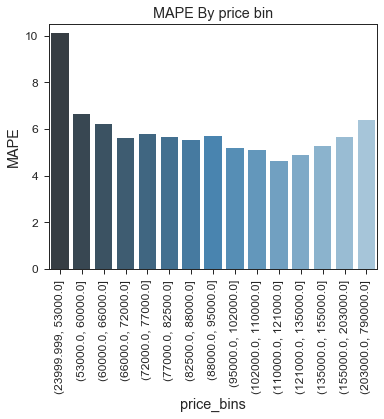

In [102]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['MAPE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('MAPE By price bin')
plt.ylim(0,10.5)

(0, 35000)

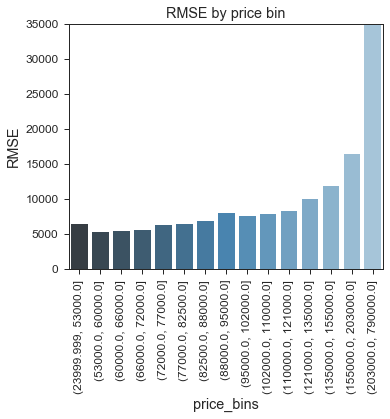

In [103]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['RMSE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('RMSE by price bin')
plt.ylim(0,35000)

## Analysis by Ku 

In [104]:
## MAPE/RMSE BINS 
Kulist = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['Ku'].unique():
    Ku = testframe[testframe['Ku'] == i]
    MAPE = mean_absolute_percentage_error(Ku['actual'],Ku['pred'])
    RMSE = np.sqrt(mean_squared_error(Ku['actual'], Ku['pred']))
    print(i, MAPE, RMSE)
    Kulist.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
KUSCORESDF = pd.DataFrame({'Ku':Kulist,'MAPE':MAPEscores,'RMSE':RMSEscores})

Nakano 6.394790696594472 8722.939012541032
Katsushika 6.1366530456541595 7035.254948790019
Meguro 5.635450014574474 16186.371697452249
Ota 5.90352004153753 9394.040295502626
Shinagawa 5.343095358701266 13363.017587172142
Adachi 6.047368721742124 7541.574496484565
Edogawa 5.92271898896776 8158.935299128825
Setagaya 6.237222513056113 12065.91900766479
Suginami 6.957187087551921 9682.67017843284
Toshima 5.90737541856015 12698.826989272138
Nerima 5.6692971016266345 9011.452571596323
Taito 5.221082197882367 12223.500745268524
Itabashi 5.617104055733591 7759.554001300697
Minato 5.68676723168466 23732.781450292397
Koto 4.716372567845928 9227.069018377199
Sumida 5.572460056197199 9265.423183568351
Shibuya 6.116786772961486 19003.958933128073
Kita 5.9768746009679585 8975.182877729016
Arakawa 6.296830156109738 9297.42503982011
Shinjuku 5.750129353118829 13650.763366678266
Bunkyo 6.02482673123192 12181.185425047563
Chiyoda 5.110189389424133 21663.72242586456
Chuo 5.561467729109925 22599.938075558

In [105]:
## Add Region Coding 
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Itabashi','Kita']),'North_outer',None)
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Nerima','Suginami','Nakano']),'West',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Toshima','Bunkyo']),'North_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Arakawa','Adachi','Katsushika','Edogawa']),'East_outer',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Koto','Taito','Sumida']),'East_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Shibuya','Shinjuku','Minato','Chiyoda','Chuo']),'Central',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Setagaya','Meguro','Shinagawa','Ota']),'South',KUSCORESDF['Region'])

In [99]:
regions= ['North_outer','West','North_inner','East_outer','East_inner','Central','South']

## MAPE by Ku

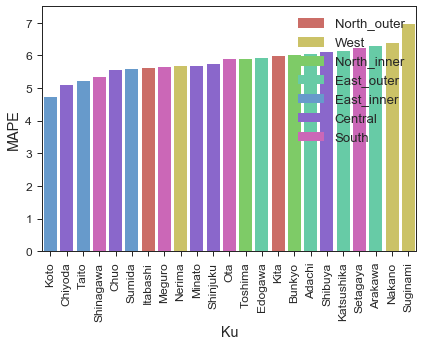

In [100]:
KUSCORESDF = KUSCORESDF.sort_values(by='MAPE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['MAPE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False, palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,7.5)
plt.legend()

## RMSE by Ku

(0, 25000)

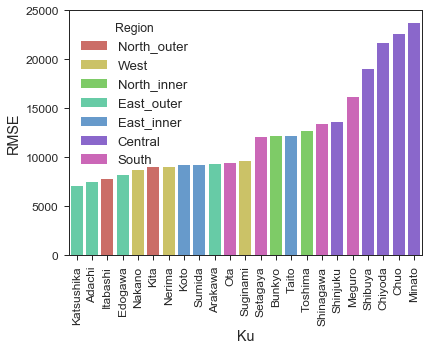

In [101]:
KUSCORESDF = KUSCORESDF.sort_values(by='RMSE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['RMSE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False,palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,25000)